In [ ]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

Scaling vs. Normalization: What's the difference? 

*   In scaling, you're changing the range of your data, while
*   In normalization, you're changing the shape of the distribution of your data.



# Scaling


This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN). With these algorithms, a change of "1" in any numeric feature is given the same importance.

**By scaling your variables, you can help compare different variables on equal footing.** 

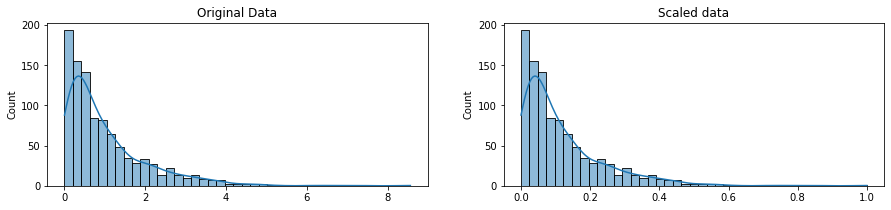

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

# Normalization

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.


> normalization means adjusting all the values measured in the different scales, in a common scale.

>In statistics, normalization is the method of rescaling data where we try to fit all the data points between the range of 0 to 1 so that the data points can become closer to each other.


> It is a very common approach to scaling the data. In this method of scaling the data, the minimum value of any feature gets converted into 0 and the maximum value of the feature gets converted into 1.

In general, you'll normalize your data if you're going to be using a **machine learning or statistics technique** that assumes your data is normally distributed. Some examples of these include linear discriminant analysis (LDA) and Gaussian naive Bayes. 
(Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method we're using to normalize here is called the **Box-Cox Transformation**.

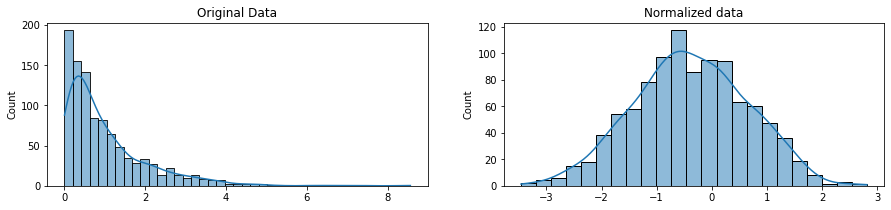

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").

##Where to Use Normalization?

Normalization method scales the data between zero to one so it is better to use with the data where the distribution of the data is not following the Gaussian distribution or we can apply with an algorithm that does not count on the distribution of the data in the procedure like K-means and KNN.

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df=np.array([[2, 3, 7, 30],
                  [9, 4, 6, 1],
                  [8, 15, 2, 40],
                  [20, 10, 2, 6]])
print(df)

[[ 2  3  7 30]
 [ 9  4  6  1]
 [ 8 15  2 40]
 [20 10  2  6]]


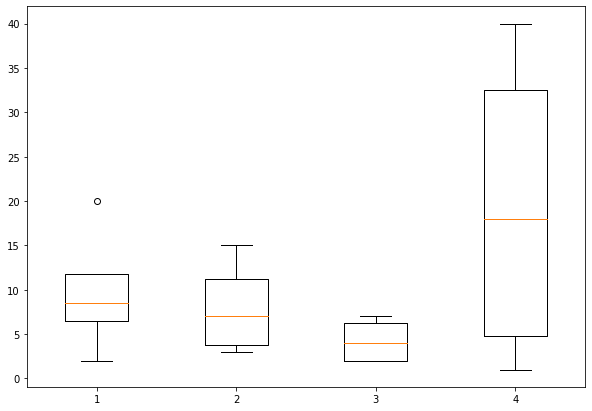

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df)
plt.show()

In [7]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
print(scaled_features)

[[0.         0.         1.         0.74358974]
 [0.38888889 0.08333333 0.8        0.        ]
 [0.33333333 1.         0.         1.        ]
 [1.         0.58333333 0.         0.12820513]]


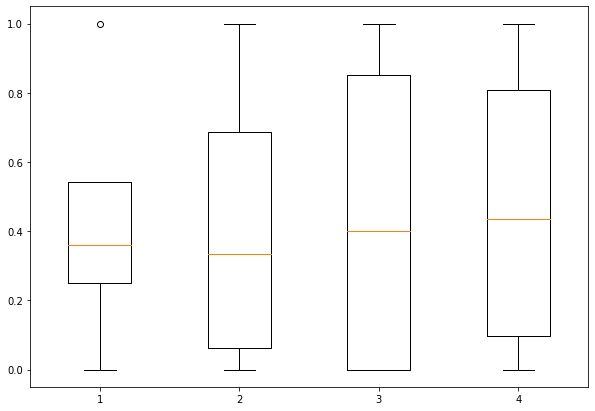

In [8]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(scaled_features)
plt.show()

##Standardization

Like normalization, standardization is also required in some forms of machine learning when the input data points are scaled in different scales. Standardization can be a common scale for these data points.  

> The basic concept behind the standardization function is to make data points centred about the mean of all the data points presented in a feature with a unit standard deviation. This means the mean of the data point will be zero and the standard deviation will be 1.

> So in standardization, the data points are rescaled by ensuring that after scaling they will be in a curve shape.








In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(df)
print(sc_X)

[[-1.19319056 -1.03142125  1.20740686  0.66200869]
 [-0.11547005 -0.825137    0.76834982 -1.12387522]
 [-0.26943013  1.44398974 -0.98787834  1.27783073]
 [ 1.57809074  0.4125685  -0.98787834 -0.8159642 ]]


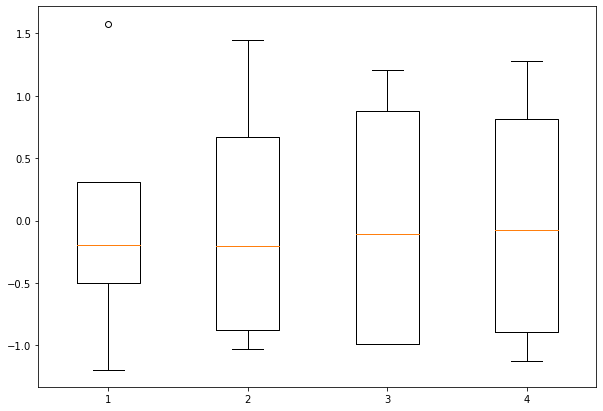

In [10]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(sc_X)
plt.show()

##Where to use Standardization?

Since the results provided by the standardization are not bounded with any range as we have seen in normalization, it can be used with the data where the distribution is following the Gaussian distribution. In the case of outliers, standardization does not harm the position wherein normalization captures all the data points in their ranges.